In [ ]:
%load_ext autoreload

In [2]:
import src.mnist

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [25]:
train_set, test_set, validation_set = src.mnist.get_mnist_full()

dtype: <class 'numpy.float64'>
dtype: <class 'numpy.float64'>


In [26]:
print(test_set)

MNIST(N=10000, name='test', rows=28, cols=28, labels=array([7, 2, 1, ..., 4, 5, 6], dtype=int8), images=array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), kmeans=None, PCA=None, binarized=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]))


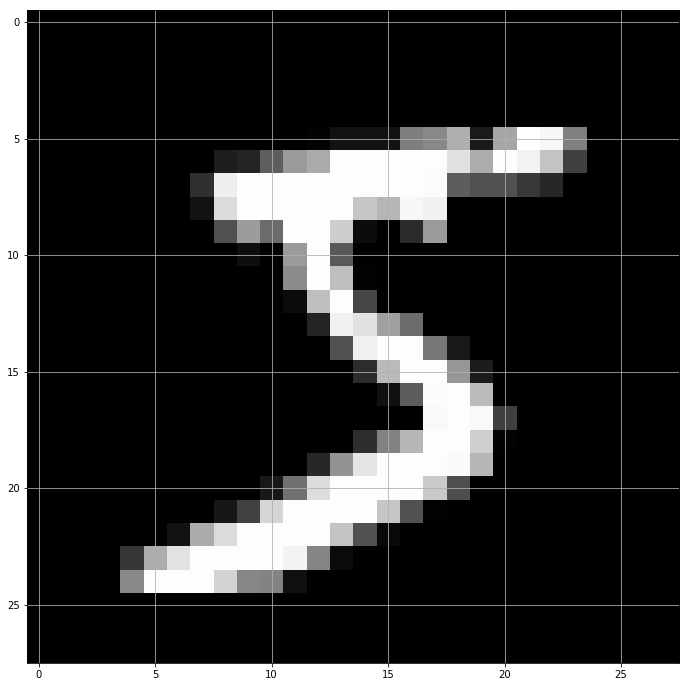

In [27]:
plt.imshow(np.reshape(train_set.images[0] + 123, (train_set.rows, train_set.cols)), cmap='gray')
plt.grid(True)
plt.show()

In [28]:
print(train_set.labels[0])

5


In [29]:
pca = PCA(n_components=2)
pca.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pca.transform(train_set.images[0].reshape(1, -1))

array([[ 125.68735303, -309.91247863]])

In [31]:
pca_train_images = pca.transform(train_set.images)

In [33]:
pca_test_images = pca.transform(test_set.images)

In [34]:
print(pca_train_images.shape[0])

50000


Populating the interactive namespace from numpy and matplotlib


/home/james/.pyenv/versions/3.5.0/envs/mnist/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


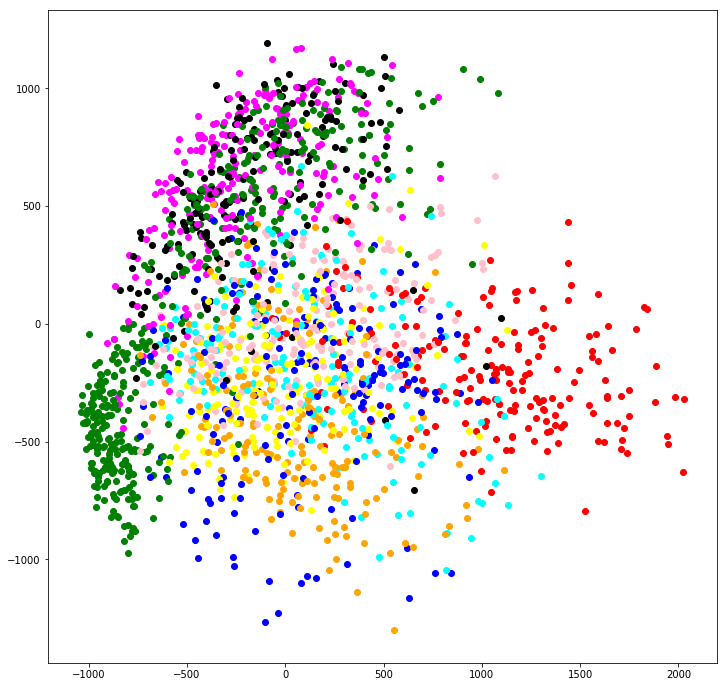

In [63]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)

color_values = ['red', 'green', 'blue', 'orange', 'green', 'cyan', 'pink', 'magenta', 'yellow', 'black']
for i in range(0, 2000):
    plt.scatter(pca_train_images[i][0], pca_train_images[i][1], color=color_values[train_set.labels[i]])

plt.show()    

In [38]:
pca2 = PCA()
pca2.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

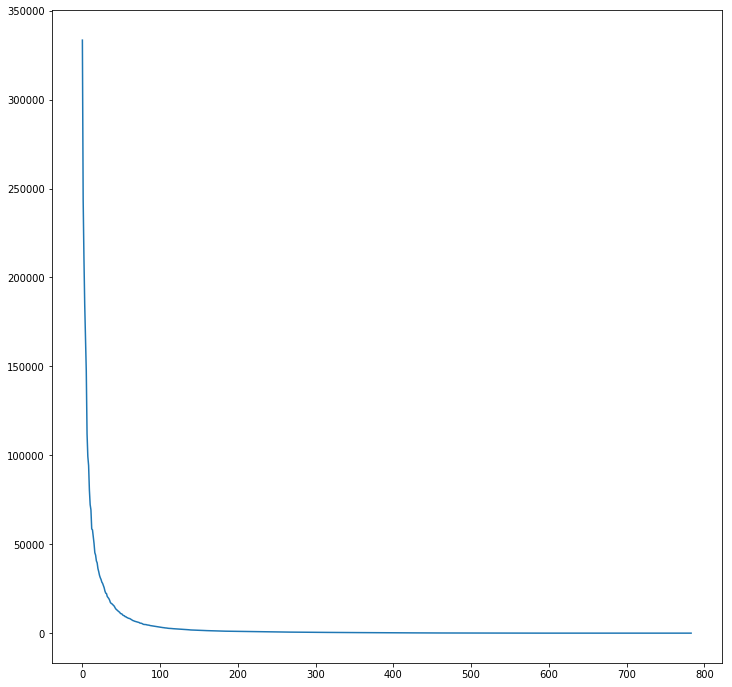

In [39]:
plt.plot(pca2.explained_variance_)

In [22]:
pca3 = PCA(n_components=100)
pca3.fit(train.images)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
train_images_pca3 = pca3.transform(train_set.images)
test_images_pca3 = pca3.transform(test_set.images)

In [42]:
clf = GaussianNB()
clf.fit(train_images_pca3, train_set.labels)

GaussianNB(priors=None)

In [56]:
label_predictions = []

for i in range(0, test_images_pca3.shape[0]):
    predicted_class = clf.predict(test_images_pca3[i].reshape(1, -1))
    label_predictions.append([test_set.labels[i], predicted_class])
    

In [50]:
def get_confusion_matrix(n_classes, label_predictions):
    ret = np.zeros((n_classes, n_classes))
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        ret[label-1, prediction-1] += 1
    return ret

In [60]:
def get_error_ratio(label_predictions):
    n_errors = 0
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        if label != prediction:
            n_errors += 1
    return float(n_errors) / float(len(label_predictions))

In [51]:
confusion_matrix = get_confusion_matrix(10, label_predictions)

In [55]:
np.set_printoptions(suppress=True, threshold=10000)
print(confusion_matrix)

[[ 1072.     7.     8.     5.    10.     8.     4.    20.     1.     0.]
 [    0.   873.    61.    12.     6.    11.    10.    45.     1.    13.]
 [    0.    38.   876.     2.    32.     3.    17.    26.    13.     3.]
 [    0.    30.     0.   856.     6.    11.     4.     6.    69.     0.]
 [    1.    10.    64.     3.   754.    11.     2.    36.     6.     5.]
 [    2.    34.     1.     6.    33.   877.     0.     1.     0.     4.]
 [   18.    46.     6.    20.    19.     2.   855.    14.    46.     2.]
 [    0.    30.    24.     9.    25.     6.     7.   852.    10.    11.]
 [    1.    28.     8.    46.    20.     1.    29.     9.   855.    12.]
 [    0.    29.     2.     0.    12.    10.     2.     5.     0.   920.]]


In [61]:
error_ratio = get_error_ratio(label_predictions)

In [62]:
print(error_ratio)

0.121
